### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [482]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
pd.set_option('display.max_columns', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [507]:
df = pd.read_csv('/Users/jaikumar/Desktop/customer_coupon/data/coupons.csv')


In [508]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [509]:
# Understanding the data 
Total_cols = df.shape[0]
print (Total_cols)
print (df.columns)

12684
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


2. Investigate the dataset for missing or problematic data.

In [510]:
# display Statistical summary of numerical columns
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


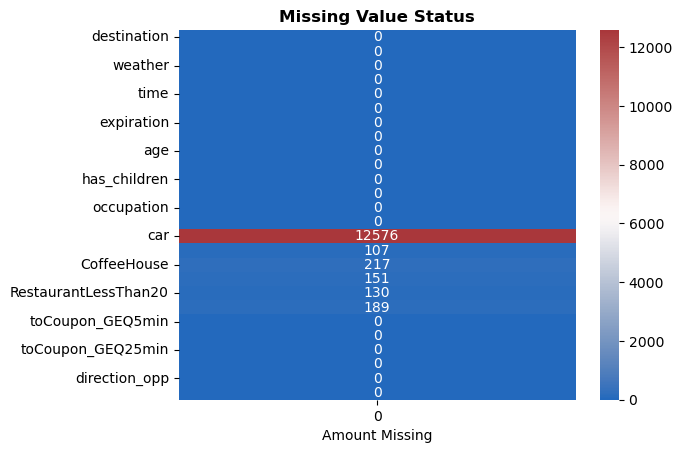

In [511]:
# Data Cleanup - Check for missing values
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

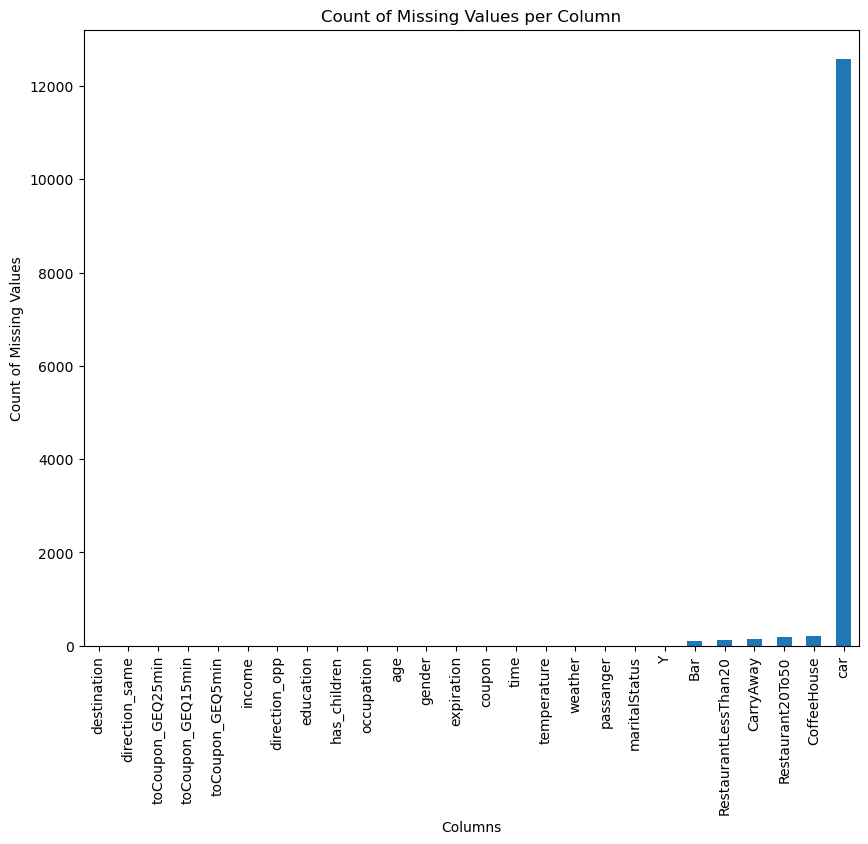

In [512]:
# Data Cleanup - Check for other missing values
missing_counts = df.isnull().sum()

# 2. Sort the counts
sorted_counts = missing_counts.sort_values()

# 3. Create the bar plot
plt.figure(figsize=(10, 8))
sorted_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values per Column')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

From the Data, I see we have missing values for some of the variables, but the biggest one is for the car column. 

In [513]:
# Handle missing values, incorrect data types, etc.
# missing values for car
Missing_cars = df["car"].isnull().sum()
print(f"The number of NA values in 'car' is: {Missing_cars}")
perCarMissing = Missing_cars/Total_cols
print(f"TPercentage of values absent in 'car' colums is: {perCarMissing}")

# we can delete the column as the # of missing values is very high and it may not be satistically signicant for observations 
df.columns = df.columns.str.strip()
if 'car' in df.columns:
    df.drop('car', axis=1, inplace=True)
print(df.columns)

The number of NA values in 'car' is: 12576
TPercentage of values absent in 'car' colums is: 0.9914853358561968
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

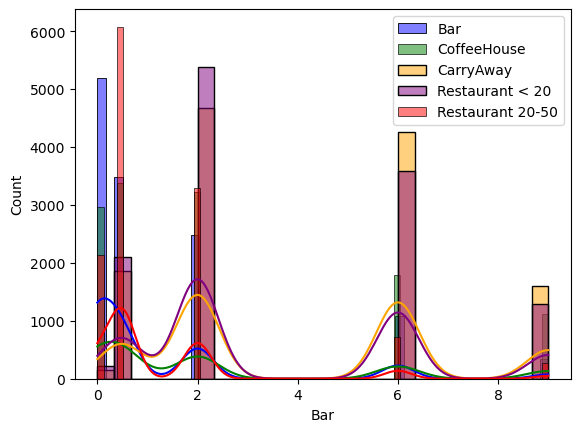

Unique values in 'Bar': [0.  0.5 2.  9.  6. ], Unique values in 'CoffeeHouse': [0.  0.5 6.  2.  9. ], Unique values in 'CarryAway': [2.  6.  9.  0.5 0. ]
Unique values in 'RestaurantLessThan20': [6.  2.  0.5 9.  0. ], Unique values in 'Restaurant20To50': [2.  0.5 0.  9.  6. ]
           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             W

In [514]:
df.dtypes
# Convert categorical variables into numerical values for the Column 'Bar', 'CoffeeHouse', 'CarryAway' to start imputing data 
mapping = {
    'never': 0.0,
    'less1': 0.5,     # Assuming 'less than 1' means 0.5 times on average
    '1~3': 2.0,         # Assuming '1 to 3' means 2 times on average
    '4~8': 6.0,         # Assuming '4 to 8' means 6 times on average
    'gt8': 9.0          # Assuming 'greater than 8' means 9 times as a conservative estimate
}

# Replace string values with integer for 'Bar', 'CoffeeHouse', 'CarryAway'
df['Bar'] = df['Bar'].replace(mapping)
df['CoffeeHouse'] = df['CoffeeHouse'].replace(mapping)
df['CarryAway'] = df['CarryAway'].replace(mapping)
df['RestaurantLessThan20']= df['RestaurantLessThan20'].replace(mapping)
df['Restaurant20To50']= df['Restaurant20To50'].replace(mapping)

# Create histograms with custom colors and add KDE plots to understand the distribution
sns.histplot(x='Bar', data=df, color='blue', label='Bar', kde=True)
sns.histplot(x='CoffeeHouse', data=df, color='green', label='CoffeeHouse', kde=True)
sns.histplot(x='CarryAway', data=df, color='orange', label='CarryAway', kde=True)
sns.histplot(x='RestaurantLessThan20', data=df, color='purple', label='Restaurant < 20', kde=True)
sns.histplot(x='Restaurant20To50', data=df, color='red', label='Restaurant 20-50', kde=True)

# Add a legend
plt.legend()

# Show the plot
plt.show()


# The Histograms do not represent a normal distribution - So I will be picking a mode imputation for the missing columns 
# Mode Imputation works better for categorical data 
df['Bar'].fillna(value=df['Bar'].mode()[0], inplace=True)
df['CoffeeHouse'].fillna(value=df['CoffeeHouse'].mode()[0], inplace=True)
df['CarryAway'].fillna(value=df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(value=df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(value=df['Restaurant20To50'].mode()[0], inplace=True)
print(f"Unique values in 'Bar': {df['Bar'].unique()}, Unique values in 'CoffeeHouse': {df['CoffeeHouse'].unique()}, Unique values in 'CarryAway': {df['CarryAway'].unique()}")
print(f"Unique values in 'RestaurantLessThan20': {df['RestaurantLessThan20'].unique()}, Unique values in 'Restaurant20To50': {df['Restaurant20To50'].unique()}")

print (df)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


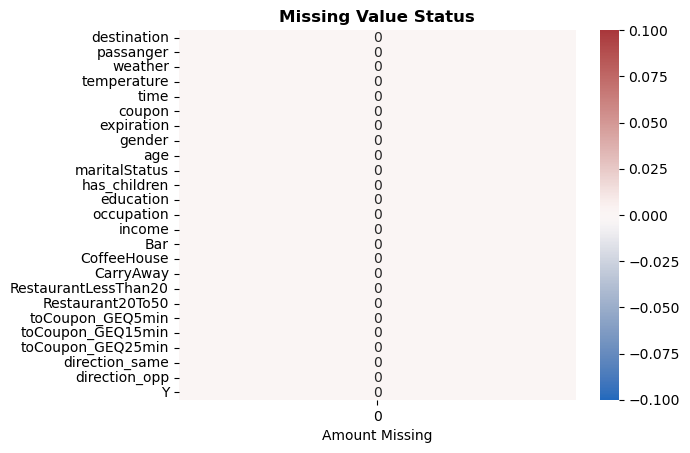

In [515]:
# Data Cleanup - Final Check for missing values
print(df.columns)
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

4. What proportion of the total observations chose to accept the coupon? 



In [516]:
# To check the proportion of total observations that chose to accept the coupon, we can find the mean of the column "Y" 
# Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ 
# and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.

CouponAcceptRate = df['Y'].mean()
print(f"Proportion of coupons accepted: {CouponAcceptRate:.2f}")


Proportion of coupons accepted: 0.57


5. Use a bar plot to visualize the `coupon` column.

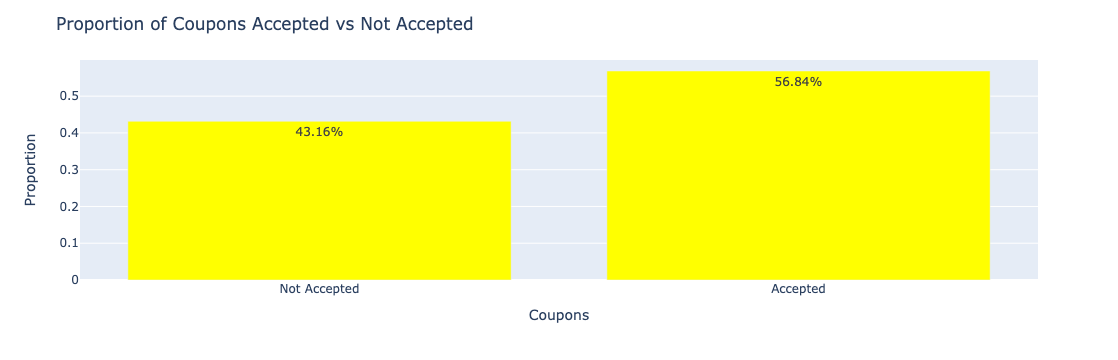

In [517]:
# Calculate the counts
CouponAcceptCount = df['Y'].value_counts(normalize=True)

# Create a bar plot
fig = px.bar(x=CouponAcceptCount.index, y=CouponAcceptCount.values, text=CouponAcceptCount.values, color_discrete_sequence=['yellow'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Coupons',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Coupons Accepted vs Not Accepted',
)
fig.show()

6. Use a histogram to visualize the temperature column.

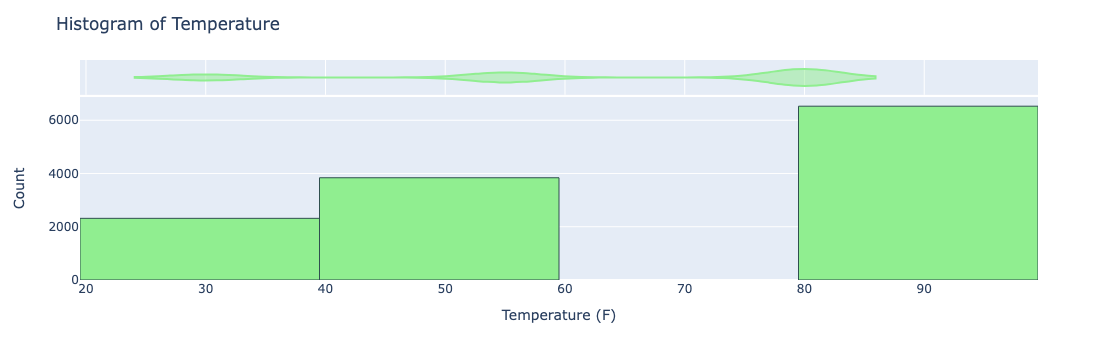

In [518]:
# getting the histogram for the Temperature column
fig = px.histogram(df, x='temperature', nbins=3, 
                   color_discrete_sequence=['lightgreen'], # Set bars to light green
                   marginal='violin') # Adds a violin plot

# Customize the marker to add edge color
fig.update_traces(marker=dict(line=dict(width=1,
                                        color='DarkSlateGrey'))) # Set edge color

fig.update_layout(
    title='Histogram of Temperature',
    xaxis_title='Temperature (F)',
    yaxis_title='Count'
)
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [519]:
# Coupon is the column that specifies the type of coupon
bar_coupons_df = df[df['coupon'] == 'Bar']
print(bar_coupons_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           2017 non-null   object 
 1   passanger             2017 non-null   object 
 2   weather               2017 non-null   object 
 3   temperature           2017 non-null   int64  
 4   time                  2017 non-null   object 
 5   coupon                2017 non-null   object 
 6   expiration            2017 non-null   object 
 7   gender                2017 non-null   object 
 8   age                   2017 non-null   object 
 9   maritalStatus         2017 non-null   object 
 10  has_children          2017 non-null   int64  
 11  education             2017 non-null   object 
 12  occupation            2017 non-null   object 
 13  income                2017 non-null   object 
 14  Bar                   2017 non-null   float64
 15  CoffeeHouse           201

2. What proportion of bar coupons were accepted?


Proportion of bar coupons accepted: 0.41


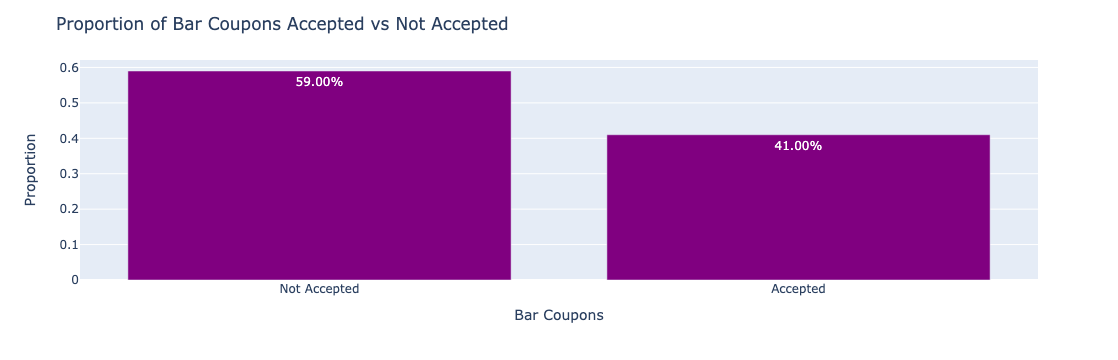

In [520]:
# Looking at the proportion of bar coupons that has a Y =1 (accepted)
# Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ 
# and answers ‘no, I do not want the coupon’ are labeled as ‘Y =
BarCoupon_acceptance_rate = bar_coupons_df['Y'].mean()
print(f"Proportion of bar coupons accepted: {BarCoupon_acceptance_rate:.2f}")

# Creating a visual plot for the bar coupons accepted 
BarCoupon_acceptance_Count = bar_coupons_df['Y'].value_counts(normalize=True)

# Create a bar plot
fig = px.bar(x=BarCoupon_acceptance_Count.index, y=BarCoupon_acceptance_Count.values, text=BarCoupon_acceptance_Count.values, color_discrete_sequence=['purple'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Bar Coupons',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Bar Coupons Accepted vs Not Accepted',
)
fig.show()

Overall we have a 41% acceptance rate for the bar coupons. 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Proportion of bar coupons accepted for bar trips <= 3 or fewer times a month: 0.37
Proportion of bar coupons accepted for bar trips > 3 times a month: 0.77


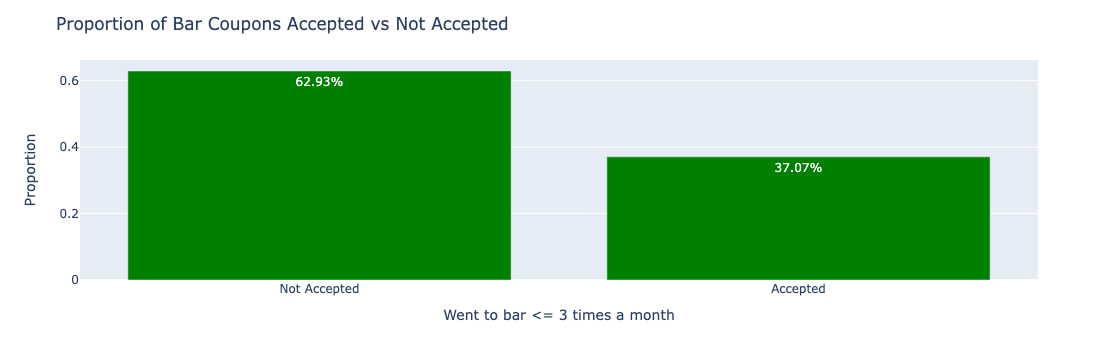

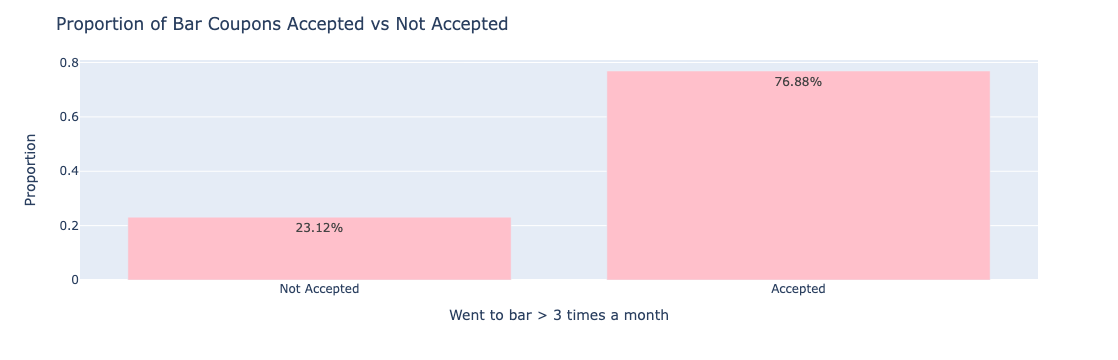

In [521]:
# The coupon acceptance rate for 3 or fewer times a month is 
#    'never': 0.0,
#    'less1': 0.5,       # Assuming 'less than 1' means 0.5 times on average
#    '1~3': 2.0,         # Assuming '1 to 3' means 2 times on average
#    '4~8': 6.0,         # Assuming '4 to 8' means 6 times on average
#    'gt8': 9.0 
BarCoupon_acceptance_rate_lt_3 = bar_coupons_df[bar_coupons_df['Bar'] <= 3.0]['Y'].mean()
print(f"Proportion of bar coupons accepted for bar trips <= 3 or fewer times a month: {BarCoupon_acceptance_rate_lt_3:.2f}")

BarCoupon_acceptance_rate_gt_3 = bar_coupons_df[bar_coupons_df['Bar'] > 3.0]['Y'].mean()
print(f"Proportion of bar coupons accepted for bar trips > 3 times a month: {BarCoupon_acceptance_rate_gt_3:.2f}")

# Creating a visual plot for the bar coupons accepted 
BarCoupon_acceptance_Count_lt_3 = bar_coupons_df[bar_coupons_df['Bar'] <= 3.0]['Y'].value_counts(normalize=True)
BarCoupon_acceptance_Count_gt_3 = bar_coupons_df[bar_coupons_df['Bar'] > 3.0]['Y'].value_counts(normalize=True)

# Create a bar plot <=3 times 
fig = px.bar(x=BarCoupon_acceptance_Count_lt_3.index, y=BarCoupon_acceptance_Count_lt_3.values, text=BarCoupon_acceptance_Count_lt_3.values, color_discrete_sequence=['green'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to bar <= 3 times a month',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Bar Coupons Accepted vs Not Accepted',
)
fig.show()

# Create a bar plot > 3 times 
fig = px.bar(x=BarCoupon_acceptance_Count_gt_3.index, y=BarCoupon_acceptance_Count_gt_3.values, text=BarCoupon_acceptance_Count_gt_3.values, color_discrete_sequence=['pink'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to bar > 3 times a month ',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Bar Coupons Accepted vs Not Accepted',
)
fig.show()


The Inference from the sample of people who went to the bar <=3 times a monnth and for those who frequented bars >3 times a month, seems like the coupons were more likely used by the population of people going > 3 times a month. The acceptance is close to 77% vs the 37% on the other group. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           2017 non-null   object 
 1   passanger             2017 non-null   object 
 2   weather               2017 non-null   object 
 3   temperature           2017 non-null   int64  
 4   time                  2017 non-null   object 
 5   coupon                2017 non-null   object 
 6   expiration            2017 non-null   object 
 7   gender                2017 non-null   object 
 8   age                   2017 non-null   int64  
 9   maritalStatus         2017 non-null   object 
 10  has_children          2017 non-null   int64  
 11  education             2017 non-null   object 
 12  occupation            2017 non-null   object 
 13  income                2017 non-null   object 
 14  Bar                   2017 non-null   float64
 15  CoffeeHouse           201

/tmp/ipykernel_49531/3333229247.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



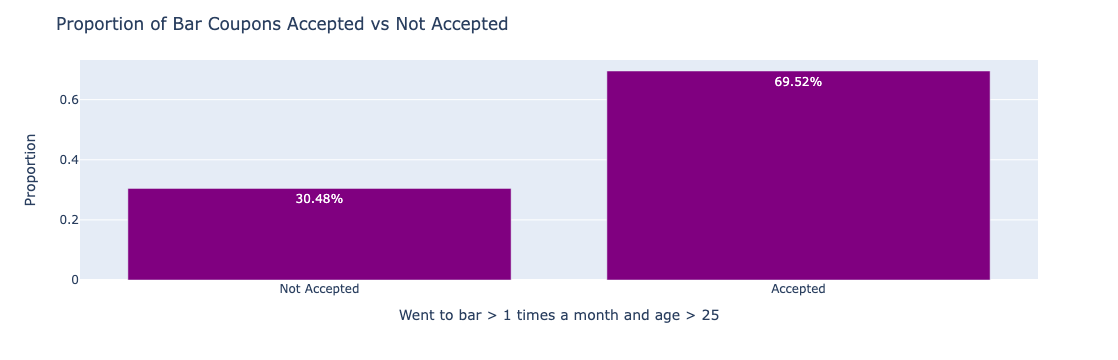

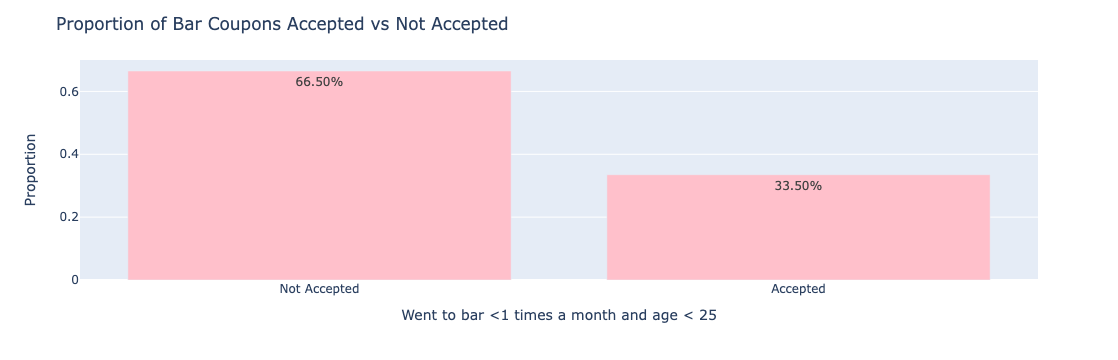

In [522]:
## look at drivers who frequent bars > 1 times a month and > 25 years of age to others 
## Age seems to be an object -> type string, we need to convert that to integer
age_mapping = {
    '21': 21,
    '26': 26,     
    '31': 31,         
    '36': 36,         
    '41': 41,          
    '46': 46,         
    '50plus': 50,         
    'below21': 20  
}

# Replace string values with integer for 'age'
bar_coupons_df['age'] = bar_coupons_df['age'].replace(age_mapping)
print(bar_coupons_df.info())

BarCoupon_acceptance_gt_1_plus25  = bar_coupons_df.loc[(bar_coupons_df['Bar'] > 1.0) & (bar_coupons_df['age'] > 25)]['Y'].mean()
NBarCoupon_acceptance_gt_1_plus25 = bar_coupons_df.loc[~((bar_coupons_df['Bar'] > 1.0) & (bar_coupons_df['age'] > 25))]['Y'].mean()
print(f"Acceptance rate for >1 bar visit & >25 age: {BarCoupon_acceptance_gt_1_plus25:.2f}")
print(f"Acceptance rate for all others: {NBarCoupon_acceptance_gt_1_plus25:.2f}")

# Creating a visual plot for the bar coupons accepted 
BarCoupon_acceptance_count_gt_1_plus25 = bar_coupons_df.loc[(bar_coupons_df['Bar'] > 1.0) & (bar_coupons_df['age'] > 25)]['Y'].value_counts(normalize=True)
NBarCoupon_acceptance_count_gt_1_plus25 = bar_coupons_df.loc[~((bar_coupons_df['Bar'] > 1.0) & (bar_coupons_df['age'] > 25))]['Y'].value_counts(normalize=True)

# Create a bar plot <=1 times 
fig = px.bar(x=BarCoupon_acceptance_count_gt_1_plus25.index, y=BarCoupon_acceptance_count_gt_1_plus25.values, text=BarCoupon_acceptance_count_gt_1_plus25.values, color_discrete_sequence=['purple'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to bar > 1 times a month and age > 25',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Bar Coupons Accepted vs Not Accepted',
)
fig.show()

# Create a bar plot > 1 times 
fig = px.bar(x=NBarCoupon_acceptance_count_gt_1_plus25.index, y=NBarCoupon_acceptance_count_gt_1_plus25.values, text=NBarCoupon_acceptance_count_gt_1_plus25.values, color_discrete_sequence=['pink'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to bar <1 times a month and age < 25 ',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Bar Coupons Accepted vs Not Accepted',
)
fig.show()

The Inference from the sample of people who went to the bar > 1 times a month and for those age is > 25 years, seems like the coupons were more likely used with a acceptance rate of 69.5% when compared to the population which went <1 times a week to the bar and under the age of 25 years.  

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : 0.71


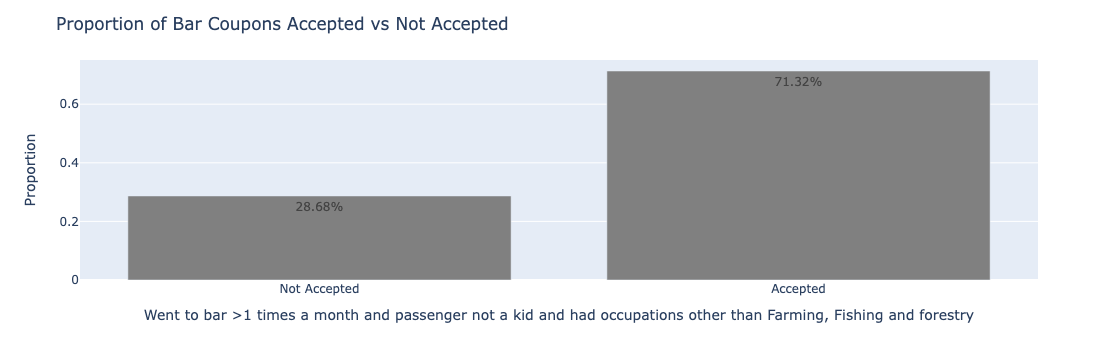

In [523]:
# look at acceptance for drivers wo go to bars > 1 time a month with passengers not a kid and with occupation other than farming, fishery and forestry
BarCoupon_acceptance_gt_1_3FNK = bar_coupons_df[(bar_coupons_df['Bar'] > 1.0) & (bar_coupons_df['passanger'] != 'Kid(s)') & (~bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry']))]['Y'].mean()
print(f"Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry : {BarCoupon_acceptance_gt_1_3FNK:.2f}")

# for plotting -> get the count
BarCoupon_acceptance_count_gt_1_3FNK5 = bar_coupons_df[(bar_coupons_df['Bar'] > 1.0) & (bar_coupons_df['passanger'] != 'Kid(s)') & (~bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry']))]['Y'].value_counts(normalize=True)

# Create a bar plot > 3 times 
fig = px.bar(x=BarCoupon_acceptance_count_gt_1_3FNK5.index, y=BarCoupon_acceptance_count_gt_1_3FNK5.values, text=BarCoupon_acceptance_count_gt_1_3FNK5.values, color_discrete_sequence=['grey'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to bar >1 times a month and passenger not a kid and had occupations other than Farming, Fishing and forestry ',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Bar Coupons Accepted vs Not Accepted',
)
fig.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [524]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
BarCoupon_acceptance_gt_1_NKNW = bar_coupons_df[(bar_coupons_df['Bar'] > 1.0) & (bar_coupons_df['passanger'] != 'Kid(s)') & (bar_coupons_df['maritalStatus'] != 'Widowed')]['Y'].mean()
print(f"Acceptance rate for drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed : {BarCoupon_acceptance_gt_1_NKNW:.2f}")

# go to bars more than once a month and are under the age of 30
BarCoupon_acceptance_gt_1_u30  = bar_coupons_df.loc[(bar_coupons_df['Bar'] > 1.0) & (bar_coupons_df['age'] < 30)]['Y'].mean()
print(f"Acceptance rate for >1 bar visit & <30 age: {BarCoupon_acceptance_gt_1_u30:.2f}")

# go to cheap restaurants more than 4 times a month and income is less than 50K
# need to map the income type object string -> to integers 
income_mapping = {
    '$100000 or More': 100000,
    '$87500 - $99999': 87500,     
    '$75000 - $87499': 75000,         
    '$62500 - $74999': 62500,         
    '$50000 - $62499': 50000,          
    '$37500 - $49999': 37500,         
    '$25000 - $37499': 25000,         
    '$12500 - $24999': 12500,
    'Less than $12500': 12499
}
# Replace string values with integer for 'income'
bar_coupons_df['income'] = bar_coupons_df['income'].replace(income_mapping)
#print(bar_coupons_df.info())
BarCoupon_acceptance_CR4IL50K= bar_coupons_df.loc[(bar_coupons_df['RestaurantLessThan20'] > 4.0) & (bar_coupons_df['income'] < 50000)]['Y'].mean()
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K : {BarCoupon_acceptance_CR4IL50K:.2f}")


Acceptance rate for drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed : 0.71
Acceptance rate for >1 bar visit & <30 age: 0.72
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K : 0.45


/tmp/ipykernel_49531/2437835705.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [525]:
## Look at drivers age <30, frequent bars > 1.0 times a month and income > 50K 
BarCoupon_acceptance_AG3050K= bar_coupons_df[(bar_coupons_df['Bar'] > 1.0) & (bar_coupons_df['age'] < 30) & (bar_coupons_df['income'] > 50000) ]['Y'].mean()
print(f"Acceptance rate for drivers  >1 bar visit, of age > 25 and income > 50K : {BarCoupon_acceptance_AG3050K:.2f}")


Acceptance rate for drivers  >1 bar visit, of age > 25 and income > 50K : 0.70


Inference from the data analysis: From the analysis from the data above, 

1. Frequency of Bar Visits: There is a strong correlation between the frequency of bar visits and coupon acceptance. Drivers who visit bars more than three times a month have a significantly higher acceptance rate (0.77) compared to those who visit three times or fewer (0.37).

2. Age Factor: Age appears to be a significant factor, with drivers over 25 years old showing a higher acceptance rate (0.70) compared to the overall acceptance rate (0.41). However, the highest acceptance rate is observed in drivers under 30 years old who visit bars more than once (0.72).

3. Income Level: Drivers with an income above 50K and who visit bars more than once have a high acceptance rate (0.70), while those who frequent cheap restaurants more than four times a month and have an income below $50K have a much lower acceptance rate (0.45).

4. Social and Lifestyle Factors: Drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed, as well as those with occupations other than farming, fishing, or forestry, show a similar acceptance rate (0.71). This suggests that social and lifestyle factors, including occupation and family status do influence coupon acceptance.

In summary, drivers who are younger than 30, visit bars frequently, have a medium to high income, and have certain social and lifestyle characteristics are more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In this exercise, I will be looking at the acceptance rate for the coffee house coupon and look at inferences

In [526]:
## Lookig at coffee house coupons and accpetance 
ch_coupons_df = df[df['coupon'] == 'Coffee House']
print(ch_coupons_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           3996 non-null   object 
 1   passanger             3996 non-null   object 
 2   weather               3996 non-null   object 
 3   temperature           3996 non-null   int64  
 4   time                  3996 non-null   object 
 5   coupon                3996 non-null   object 
 6   expiration            3996 non-null   object 
 7   gender                3996 non-null   object 
 8   age                   3996 non-null   object 
 9   maritalStatus         3996 non-null   object 
 10  has_children          3996 non-null   int64  
 11  education             3996 non-null   object 
 12  occupation            3996 non-null   object 
 13  income                3996 non-null   object 
 14  Bar                   3996 non-null   float64
 15  CoffeeHouse           399

Proportion of Coffeehouse coupons accepted: 0.50


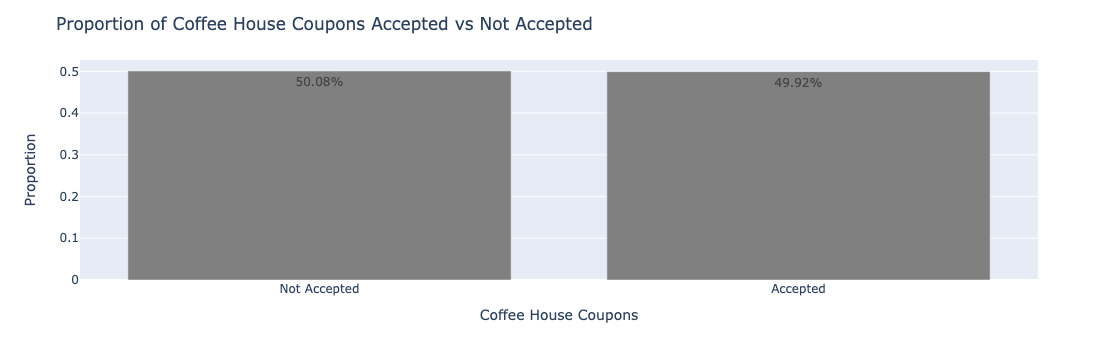

Proportion of Coffee House coupons accepted for trips <= 2 or fewer times a month: 0.45
Proportion of Coffee House coupons accepted for trips > 2 times a month: 0.68


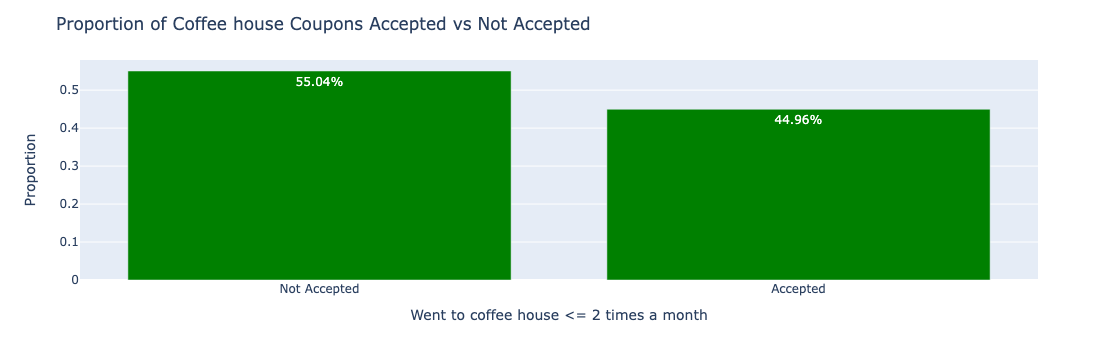

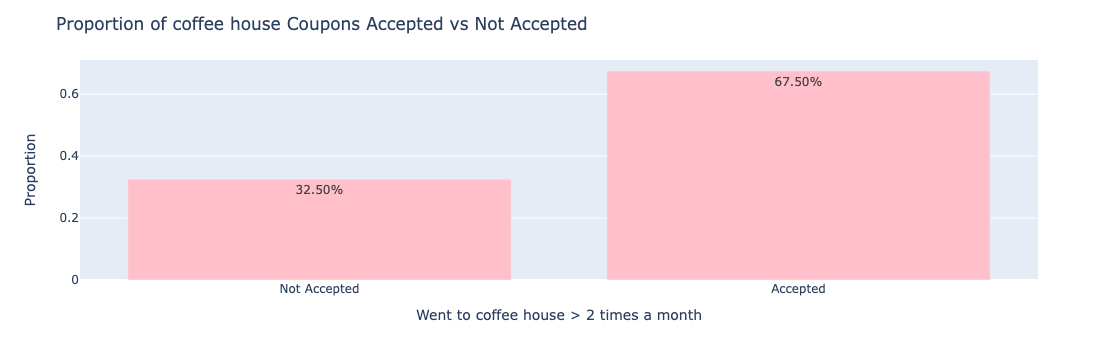

In [527]:
# Looking at the coffee house coupon acceptance rate overall 
# Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ 
# and answers ‘no, I do not want the coupon’ are labeled as ‘Y =
CH_Coupon_acceptance_rate = ch_coupons_df['Y'].mean()
print(f"Proportion of Coffeehouse coupons accepted: {CH_Coupon_acceptance_rate:.2f}")

# Creating a visual plot for the bar coupons accepted 
CH_Coupon_acceptance_Count = ch_coupons_df['Y'].value_counts(normalize=True)

# Create a bar plot
fig = px.bar(x=CH_Coupon_acceptance_Count.index, y=CH_Coupon_acceptance_Count.values, text=CH_Coupon_acceptance_Count.values, color_discrete_sequence=['grey'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Coffee House Coupons',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Coffee House Coupons Accepted vs Not Accepted',
)
fig.show()

# The coupon acceptance rate for coffee house accepted for trips > 2 times a month is 
#    'never': 0.0,
#    'less1': 0.5,       # Assuming 'less than 1' means 0.5 times on average
#    '1~3': 2.0,         # Assuming '1 to 3' means 2 times on average
#    '4~8': 6.0,         # Assuming '4 to 8' means 6 times on average
#    'gt8': 9.0 
CH_Coupon_acceptance_rate_lt_2 = ch_coupons_df[ch_coupons_df['CoffeeHouse'] <= 2.0]['Y'].mean()
print(f"Proportion of Coffee House coupons accepted for trips <= 2 or fewer times a month: {CH_Coupon_acceptance_rate_lt_2:.2f}")

CH_Coupon_acceptance_rate_gt_2 = ch_coupons_df[ch_coupons_df['CoffeeHouse'] > 2.0]['Y'].mean()
print(f"Proportion of Coffee House coupons accepted for trips > 2 times a month: {CH_Coupon_acceptance_rate_gt_2:.2f}")

# Creating a visual plot for the bar coupons accepted 
CH_Coupon_acceptance_Count_lt_2 = ch_coupons_df[ch_coupons_df['CoffeeHouse'] <= 2.0]['Y'].value_counts(normalize=True)
CH_Coupon_acceptance_rate_gt_2 = ch_coupons_df[ch_coupons_df['CoffeeHouse'] > 2.0]['Y'].value_counts(normalize=True)

# Create a bar plot <=3 times 
fig = px.bar(x=CH_Coupon_acceptance_Count_lt_2.index, y=CH_Coupon_acceptance_Count_lt_2.values, text=CH_Coupon_acceptance_Count_lt_2.values, color_discrete_sequence=['green'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to coffee house <= 2 times a month',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Coffee house Coupons Accepted vs Not Accepted',
)
fig.show()

# Create a bar plot > 3 times 
fig = px.bar(x=CH_Coupon_acceptance_rate_gt_2.index, y=CH_Coupon_acceptance_rate_gt_2.values, text=CH_Coupon_acceptance_rate_gt_2.values, color_discrete_sequence=['pink'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to coffee house > 2 times a month ',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of coffee house Coupons Accepted vs Not Accepted',
)
fig.show()



<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           3996 non-null   object 
 1   passanger             3996 non-null   object 
 2   weather               3996 non-null   object 
 3   temperature           3996 non-null   int64  
 4   time                  3996 non-null   object 
 5   coupon                3996 non-null   object 
 6   expiration            3996 non-null   object 
 7   gender                3996 non-null   object 
 8   age                   3996 non-null   int64  
 9   maritalStatus         3996 non-null   object 
 10  has_children          3996 non-null   int64  
 11  education             3996 non-null   object 
 12  occupation            3996 non-null   object 
 13  income                3996 non-null   object 
 14  Bar                   3996 non-null   float64
 15  CoffeeHouse           399

/tmp/ipykernel_49531/1135916366.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



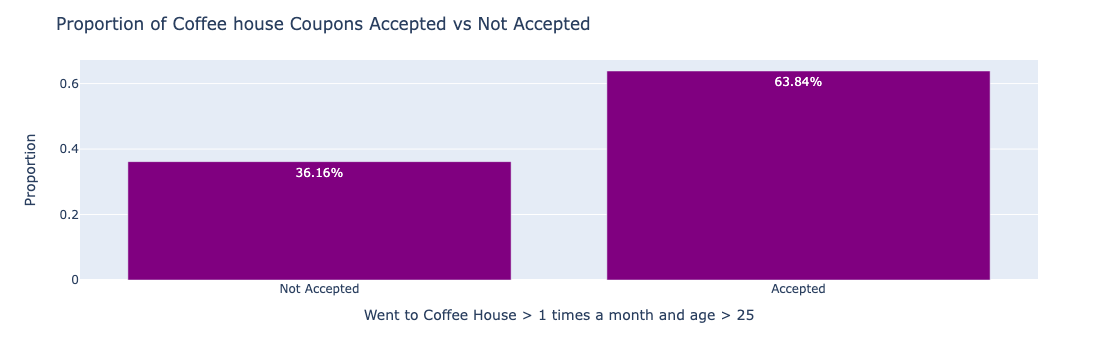

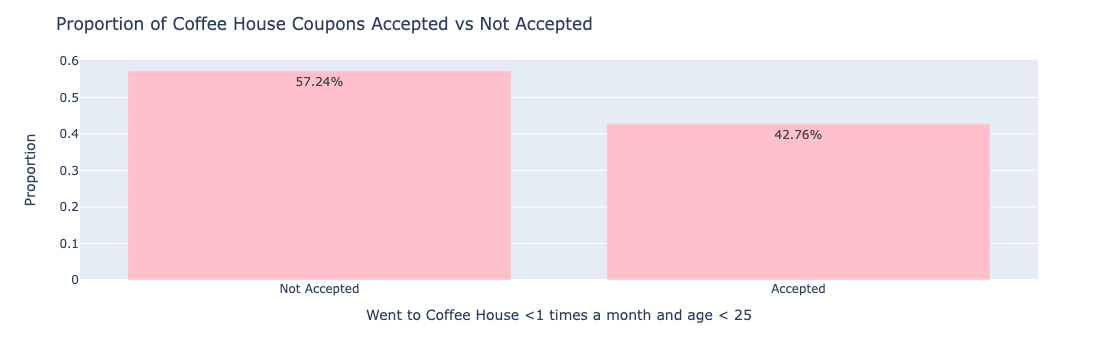

In [528]:
## look at drivers who frequent coffeehouse > 1 times a month and > 25 years of age to others 
## Age seems to be an object -> type string, we need to convert that to integer
age_mapping = {
    '21': 21,
    '26': 26,     
    '31': 31,         
    '36': 36,         
    '41': 41,          
    '46': 46,         
    '50plus': 50,         
    'below21': 20  
}

# Replace string values with integer for 'age'
ch_coupons_df['age'] = ch_coupons_df['age'].replace(age_mapping)
print(ch_coupons_df.info())

CH_Coupon_acceptance_gt_1_plus25  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] > 25)]['Y'].mean()
NCH_Coupon_acceptance_gt_1_plus25 = ch_coupons_df.loc[~((ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] > 25))]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & >25 age: {CH_Coupon_acceptance_gt_1_plus25:.2f}")
print(f"Acceptance rate for all others: {NCH_Coupon_acceptance_gt_1_plus25:.2f}")

# Creating a visual plot for the bar coupons accepted 
CH_Coupon_acceptance_count_gt_1_plus25 = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] > 25)]['Y'].value_counts(normalize=True)
NCH_Coupon_acceptance_count_gt_1_plus25 = ch_coupons_df.loc[~((ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] > 25))]['Y'].value_counts(normalize=True)

# Create a bar plot <=1 times 
fig = px.bar(x=CH_Coupon_acceptance_count_gt_1_plus25.index, y=CH_Coupon_acceptance_count_gt_1_plus25.values, text=CH_Coupon_acceptance_count_gt_1_plus25.values, color_discrete_sequence=['purple'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to Coffee House > 1 times a month and age > 25',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Coffee house Coupons Accepted vs Not Accepted',
)
fig.show()

# Create a bar plot > 1 times 
fig = px.bar(x=NCH_Coupon_acceptance_count_gt_1_plus25.index, y=NCH_Coupon_acceptance_count_gt_1_plus25.values, text=NCH_Coupon_acceptance_count_gt_1_plus25.values, color_discrete_sequence=['pink'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to Coffee House <1 times a month and age < 25 ',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Coffee House Coupons Accepted vs Not Accepted',
)
fig.show()

Acceptance rate for >1 coffee house visit & Marital status single: 0.68
Acceptance rate for all others: 0.45
Acceptance rate for >1 coffee house visit & Marital status Divorced: 0.60
Acceptance rate for all others: 0.50
Acceptance rate for >1 coffee house visit & <30 age: 0.69
Acceptance rate for >1 coffee house visit & <30 age and income >50K : 0.70
Acceptance rate for >1 coffee house visit & <30 age and education is high school : 0.71
Acceptance rate for >1 coffee house visit & <30 age and education is Graduate degree : 0.71
Acceptance rate for >1 coffee house visit & <30 age and education is Associates degree : 0.71
Acceptance rate for >1 coffee house visit & <30 age and male: 0.66
Acceptance rate for >1 coffee house visit & <30 age and female: 0.72


/tmp/ipykernel_49531/837095431.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



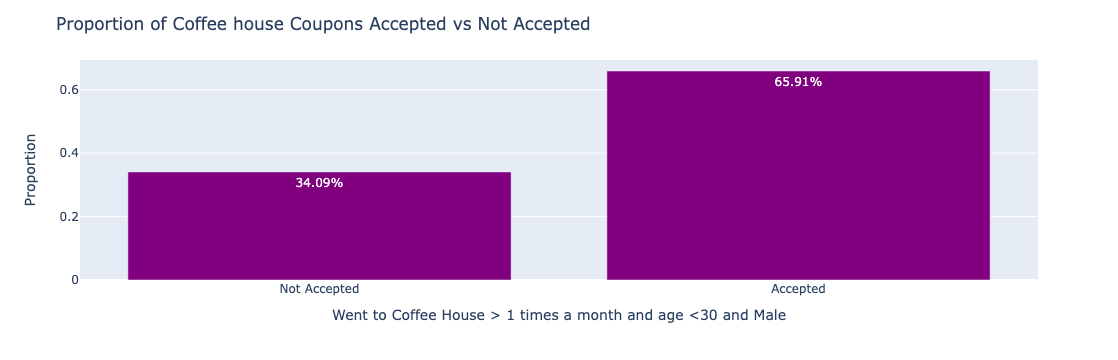

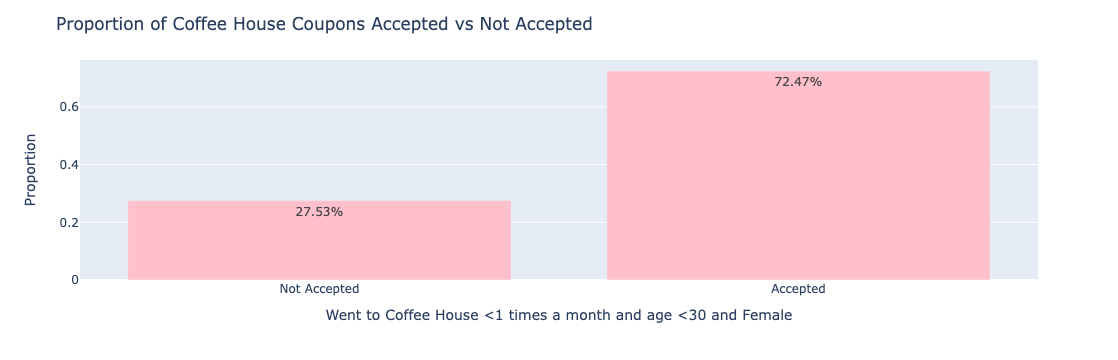

In [529]:
# look at acceptance for drivers wo go to Coffee house > 1 time a month with passengers not a kid and Marital status single
CH_Coupon_acceptance_gt_1_MSS  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['maritalStatus'] == 'Single') & (ch_coupons_df['passanger'] != 'Kid(s)')]['Y'].mean()
NCH_Coupon_acceptance_gt_1_MSS = ch_coupons_df.loc[~((ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['maritalStatus'] == 'Single') & (ch_coupons_df['passanger'] != 'Kid(s)'))]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & Marital status single: {CH_Coupon_acceptance_gt_1_MSS:.2f}")
print(f"Acceptance rate for all others: {NCH_Coupon_acceptance_gt_1_MSS:.2f}")

# look at acceptance for drivers wo go to Coffee house > 1 time a month and Marital status Divorced
CH_Coupon_acceptance_gt_1_MSSNK  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['maritalStatus'] == 'Divorced')]['Y'].mean()
NCH_Coupon_acceptance_gt_1_MSSNK = ch_coupons_df.loc[~((ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['maritalStatus'] == 'Divorced'))]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & Marital status Divorced: {CH_Coupon_acceptance_gt_1_MSSNK:.2f}")
print(f"Acceptance rate for all others: {NCH_Coupon_acceptance_gt_1_MSSNK:.2f}")

# go to bars more than once a month and are under the age of 30
CH_Coupon_acceptance_gt_1_u30  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30)]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age: {CH_Coupon_acceptance_gt_1_u30:.2f}")

# need to map the income type object string -> to integers 
income_mapping = {
    '$100000 or More': 100000,
    '$87500 - $99999': 87500,     
    '$75000 - $87499': 75000,         
    '$62500 - $74999': 62500,         
    '$50000 - $62499': 50000,          
    '$37500 - $49999': 37500,         
    '$25000 - $37499': 25000,         
    '$12500 - $24999': 12500,
    'Less than $12500': 12499
}
# Replace string values with integer for 'income'
ch_coupons_df['income'] = ch_coupons_df['income'].replace(income_mapping)

#go to bars more than once a month and are under the age of 30 and income > 50K
CH_Coupon_acceptance_gt_1_u30_IG50  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['income'] > 50000)]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age and income >50K : {CH_Coupon_acceptance_gt_1_u30_IG50:.2f}")

#go to bars more than once a month and are under the age of 30 and education type
CH_Coupon_acceptance_gt_1_u30_SHS  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['education'] == 'Some High School')]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age and education is high school : {CH_Coupon_acceptance_gt_1_u30_SHS:.2f}")

CH_Coupon_acceptance_gt_1_u30_GD  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['education'] == 'Graduate degree (Masters or Doctorate)')]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age and education is Graduate degree : {CH_Coupon_acceptance_gt_1_u30_GD:.2f}")

CH_Coupon_acceptance_gt_1_u30_AD  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['education'] == 'Associates degree')]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age and education is Associates degree : {CH_Coupon_acceptance_gt_1_u30_AD:.2f}")

# go to bars more than once a month and are under the age of 30 gender male/ female
CH_Coupon_acceptance_gt_1_u30_gm  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['gender'] == 'Male')]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age and male: {CH_Coupon_acceptance_gt_1_u30_gm:.2f}")
CH_Coupon_acceptance_gt_1_u30_gf  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['gender'] == 'Female')]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age and female: {CH_Coupon_acceptance_gt_1_u30_gf:.2f}")

CH_Coupon_acceptance_gt_1_u30_gm_count  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['gender'] == 'Male')]['Y'].value_counts(normalize=True)
CH_Coupon_acceptance_gt_1_u30_gf_count  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['gender'] == 'Female')]['Y'].value_counts(normalize=True)

# Create a bar plot for male 
fig = px.bar(x=CH_Coupon_acceptance_gt_1_u30_gm_count.index, y=CH_Coupon_acceptance_gt_1_u30_gm_count.values, text=CH_Coupon_acceptance_gt_1_u30_gm_count.values, color_discrete_sequence=['purple'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to Coffee House > 1 times a month and age <30 and Male',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Coffee house Coupons Accepted vs Not Accepted',
)
fig.show()

# Create a bar plot for female
fig = px.bar(x=CH_Coupon_acceptance_gt_1_u30_gf_count.index, y=CH_Coupon_acceptance_gt_1_u30_gf_count.values, text=CH_Coupon_acceptance_gt_1_u30_gf_count.values, color_discrete_sequence=['pink'])
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(
    xaxis=dict(
        title='Went to Coffee House <1 times a month and age <30 and Female ',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Not Accepted', 'Accepted']
    ),
    yaxis=dict(
        title='Proportion'
    ),
    title='Proportion of Coffee House Coupons Accepted vs Not Accepted',
)
fig.show()




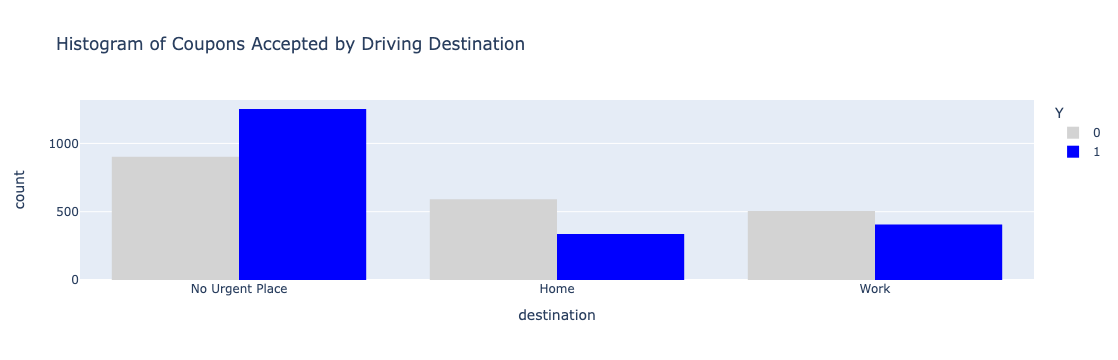

Acceptance rate for >1 coffee house visit & <30 age and destination is no urgent place: 0.78


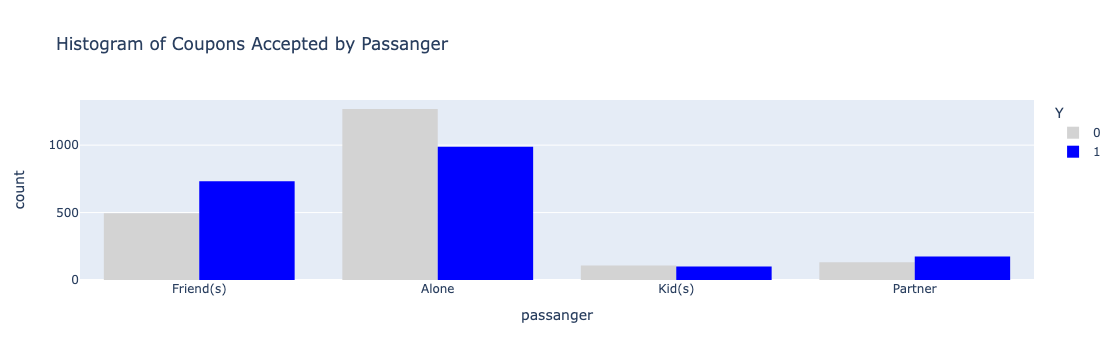

Acceptance rate for >1 coffee house visit & <30 age and passanger is a friend: 0.79


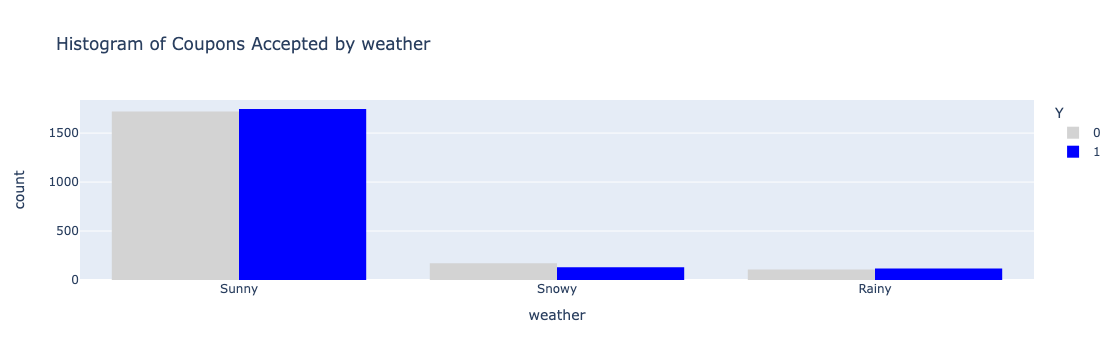

Acceptance rate for >1 coffee house visit & <30 age and passanger is a friend and weather is sunny: 0.79


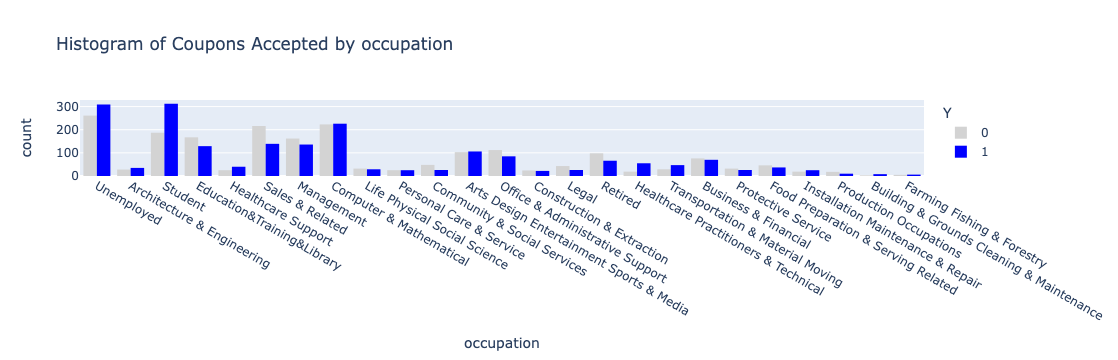

Acceptance rate for >1 coffee house visit & <30 age and passanger is a friend and occupation is student: 0.84


In [530]:
color_map = {0: 'lightgrey', 1: 'blue'}

# look at the Destination and plot the histogram of coupons accepted
fig = px.histogram(ch_coupons_df, x='destination', color='Y',
                   barmode='group',
                   title='Histogram of Coupons Accepted by Driving Destination',color_discrete_map=color_map)
fig.show()

# go to bars more than once a month and are under the age of 30 and destination is no urgent place
CH_Coupon_acceptance_gt_1_u30_dnup  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['destination'] == 'No Urgent Place')]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age and destination is no urgent place: {CH_Coupon_acceptance_gt_1_u30_dnup:.2f}")

# look at the passanger and plot the histogram of coupons accepted
fig = px.histogram(ch_coupons_df, x='passanger', color='Y',
                   barmode='group',
                   title='Histogram of Coupons Accepted by Passanger',color_discrete_map=color_map)
fig.show()
# go to bars more than once a month and are under the age of 30 and passanger is a friend
CH_Coupon_acceptance_gt_1_u30_pf  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['passanger'] == 'Friend(s)')]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age and passanger is a friend: {CH_Coupon_acceptance_gt_1_u30_pf:.2f}")

# look at the passanger and plot the histogram of coupons accepted
fig = px.histogram(ch_coupons_df, x='weather', color='Y',
                   barmode='group',
                   title='Histogram of Coupons Accepted by weather',color_discrete_map=color_map)
fig.show()
# go to bars more than once a month and are under the age of 30 and passanger is a friend and weather is sunny
CH_Coupon_acceptance_gt_1_u30_pfws  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['passanger'] == 'Friend(s)') & (ch_coupons_df['weather'] == 'Sunny')]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age and passanger is a friend and weather is sunny: {CH_Coupon_acceptance_gt_1_u30_pfws:.2f}")

# look at the occupation and plot the histogram of coupons accepted
fig = px.histogram(ch_coupons_df, x='occupation', color='Y',
                   barmode='group',
                   title='Histogram of Coupons Accepted by occupation',color_discrete_map=color_map)
fig.show()
# go to bars more than once a month and are under the age of 30 and passanger is a friend and occupation is student
CH_Coupon_acceptance_gt_1_u30_pfos  = ch_coupons_df.loc[(ch_coupons_df['CoffeeHouse'] > 1.0) & (ch_coupons_df['age'] < 30) & (ch_coupons_df['passanger'] == 'Friend(s)') & (ch_coupons_df['occupation'] == 'Student')]['Y'].mean()
print(f"Acceptance rate for >1 coffee house visit & <30 age and passanger is a friend and occupation is student: {CH_Coupon_acceptance_gt_1_u30_pfos:.2f}")



Analyzing the data provided, we can draw several conclusions about the drivers who have a better coupon acceptance rate for coffee houses:

Visit Frequency: Drivers who visit coffee houses more than twice a month have a significantly higher coupon acceptance rate (0.68) compared to those who visit less frequently (0.45).

Age: Younger drivers, particularly those under 30, show a higher propensity to accept coupons (0.69), with the rate increasing for those with an income over $50K (0.70). This trend remains consistent across different education levels, with high school, graduate, and associate degree holders all showing an acceptance rate of 0.71.

Marital Status: Single drivers have a higher acceptance rate (0.68) than divorced drivers (0.60) and the general population (0.43 for all others). This suggests that marital status influences coupon acceptance behavior.

Gender: Female drivers under 30 have a higher acceptance rate (0.72) than their male counterparts (0.66).

Social Context: Drivers under 30 heading to non-urgent destinations have a high acceptance rate (0.78), which increases further when the passenger is a friend (0.79). The acceptance rate is at its peak on sunny days with a friend as a passenger (0.79), and it’s highest for students in this scenario (0.84).

In conclusion, the drivers most likely to accept coffee house coupons are those who are younger, visit coffee houses regularly, are single, have incomes greater than 50K, and are in a social setting (especially with friends) and favorable weather conditions.